In [1]:
from experiments.PNB.ARUNet_Artery_Network import ARUNet_Artery_Network
from utils.ARGUS_vfold_setup import *
from utils.ARGUS_UNet_train_test import *
from utils.ARGUS_visualization import *
import argparse

In [2]:
img_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/PNB/Data_PNB/annotations_yuri/Resized_raw_images/"
annotations_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/PNB/Data_PNB/annotations_yuri/CLEANED/Resized/"

p_prefix = [' 11',
            ' 67', 
            ' 93', 
            ' 94', 
            ' 134', 
            ' 211', 
            ' 222A',  
            ' 153', 
            ' 240',  
            ' 193']
n_prefix = [' 57',
        ' 136', 
        ' 179', 
        ' 189', 
        ' 204', 
        ' 205', 
        ' 217', 
        ' 238',  
        ' 39',
        ' 191']

myNetwork = ARUNet_Artery_Network()

In [3]:
setup_vfold_files(myNetwork, 
                img_dir=img_folder, 
                anno_dir=annotations_folder, 
                p_prefix=p_prefix, 
                n_prefix=n_prefix)



Total size of images in the dataset: 
5.37573701236397 gibibyte


Total size of labels in the dataset: 
0.00852973572909832 gibibyte


Num images / labels = 25 25


0 [[' 11'], [' 57']]
1 [[' 67'], [' 136']]
2 [[' 93'], [' 179']]
3 [[' 94'], [' 189']]
4 [[' 134'], [' 204']]
5 [[' 211'], [' 205']]
6 [[' 222A'], [' 217']]
7 [[' 153'], [' 238']]
8 [[' 240'], [' 39']]
9 [[' 193'], [' 191']]


18 5 2
19 4 2
19 4 2
19 4 2
18 4 3
17 5 3
16 6 3
16 6 3
16 6 3
17 6 2


Loading dataset: 100%|██████████| 2/2 [00:04<00:00,  2.08s/it]


VFOLD = 0 of 9
Image: 5. 191 AC_Video 5_cropM.nii.gz


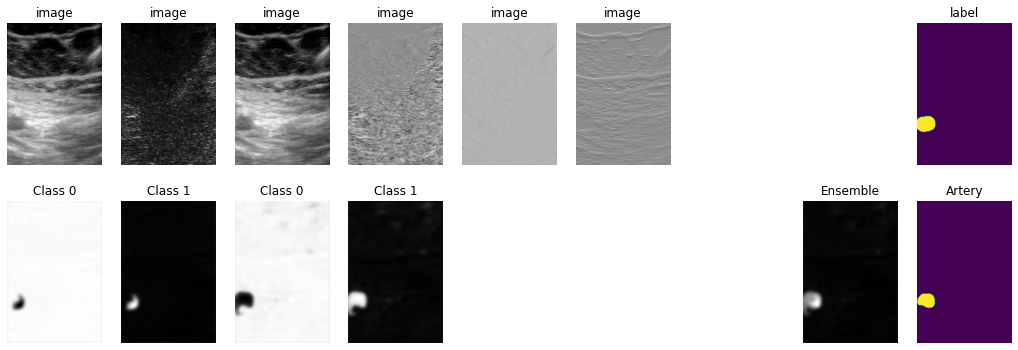

Image: 7. 193 AC Video 4_cropM.nii.gz


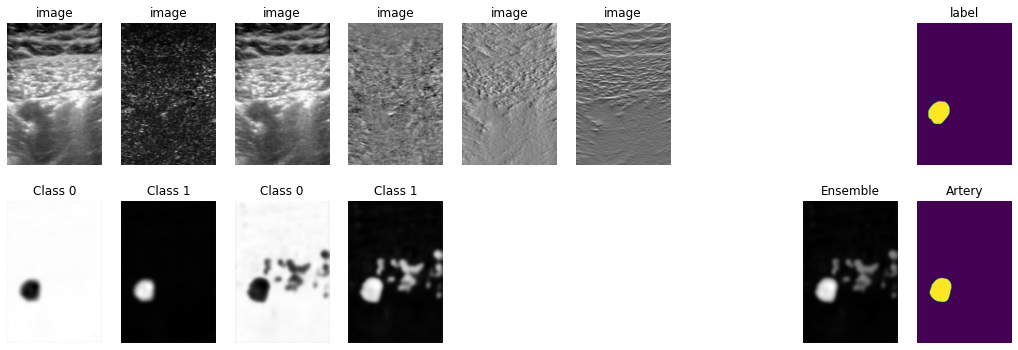

Loading dataset: 100%|██████████| 2/2 [00:03<00:00,  1.97s/it]


VFOLD = 1 of 9
Image: 1. 57 AC_Video 1_cropM.nii.gz


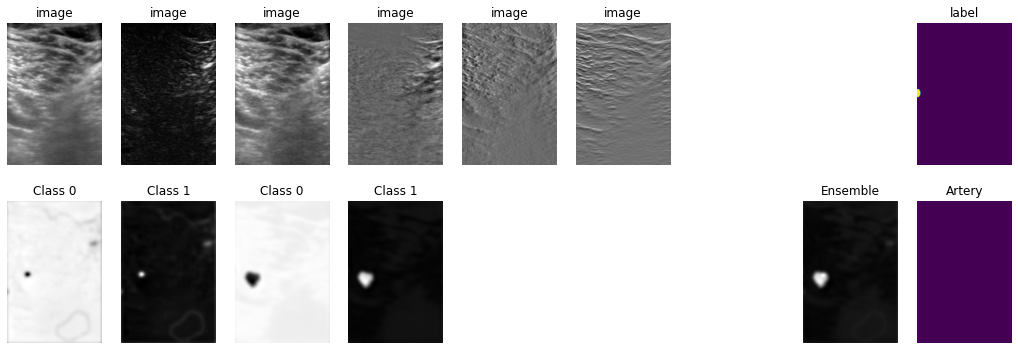

Image: 3. 11 AC_Video 2_cropM.nii.gz


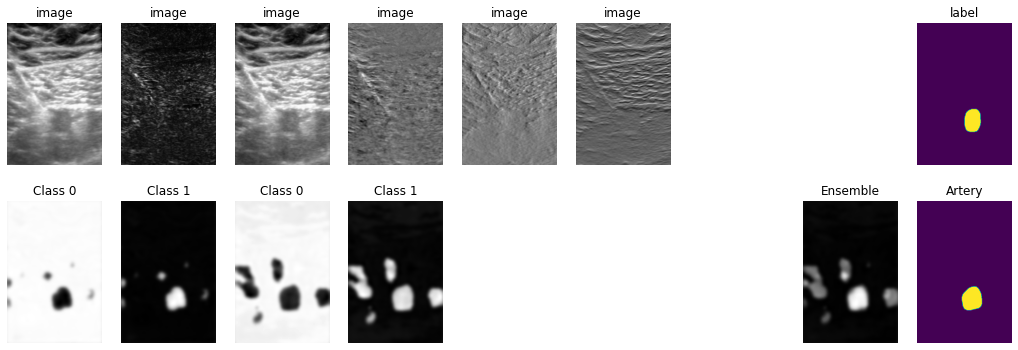

Loading dataset: 100%|██████████| 2/2 [00:04<00:00,  2.24s/it]


VFOLD = 2 of 9
Image: 1. 136 AC_Video 1_cropM.nii.gz


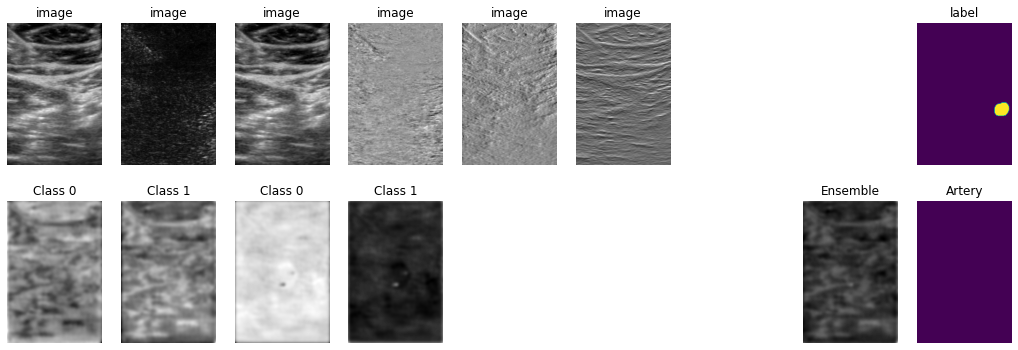

Image: 3. 67 AC_Video 2_cropM.nii.gz


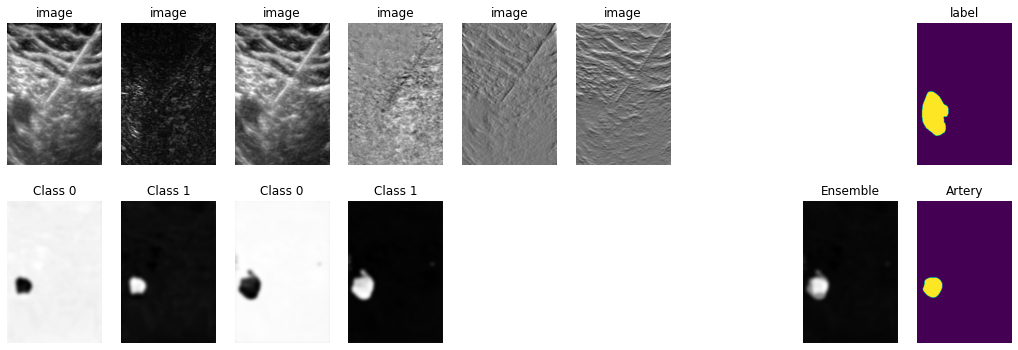

Loading dataset: 100%|██████████| 2/2 [00:03<00:00,  1.82s/it]


VFOLD = 3 of 9
Image: 1. 179 AC_Video 1_cropM.nii.gz


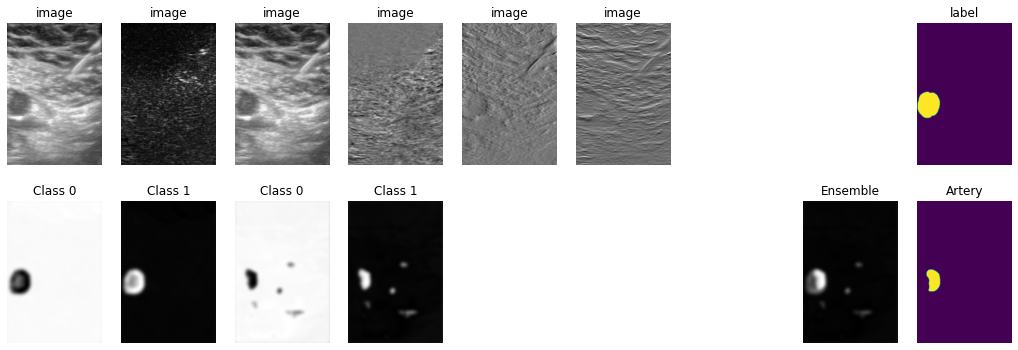

Image: 3. 93 AC_Video 2_cropM.nii.gz


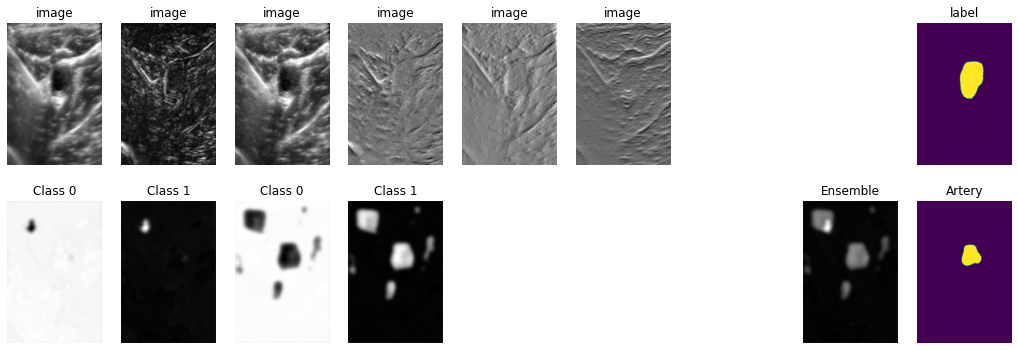

Loading dataset: 100%|██████████| 3/3 [00:05<00:00,  1.72s/it]


VFOLD = 4 of 9
Image: 1. 189 AC_Video 1_cropM.nii.gz


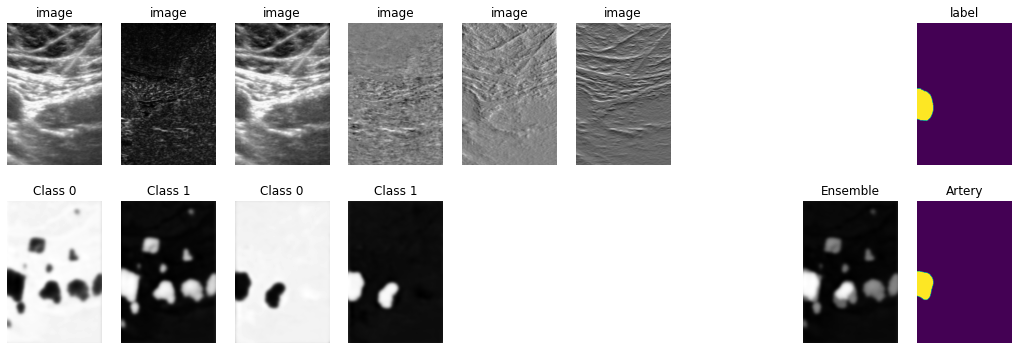

Image: 3. 189 AC_Video 2_cropM.nii.gz


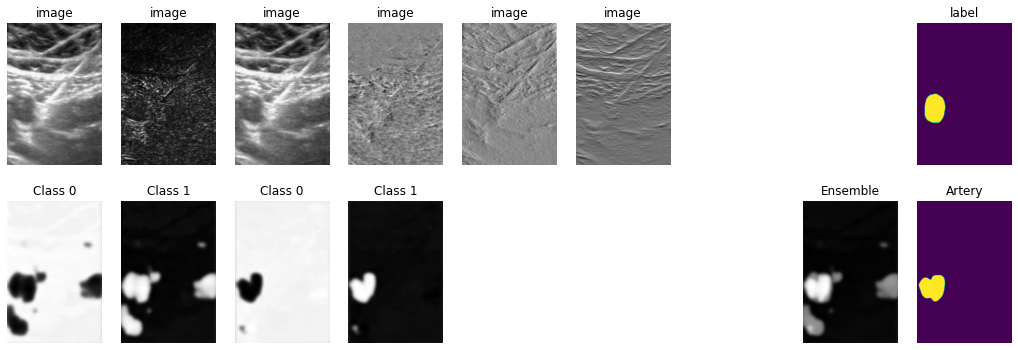

Image: 3. 94 AC_Video 2_cropM.nii.gz


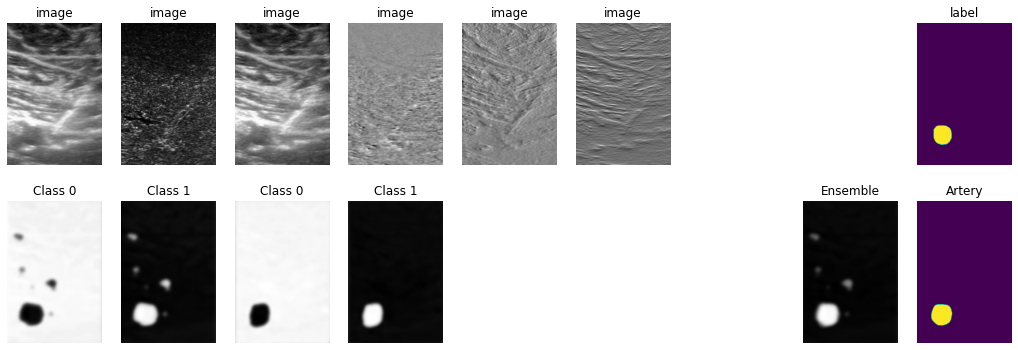

Loading dataset: 100%|██████████| 3/3 [00:06<00:00,  2.23s/it]


VFOLD = 5 of 9
Image: 1. 134 AC_Video 1_cropM.nii.gz


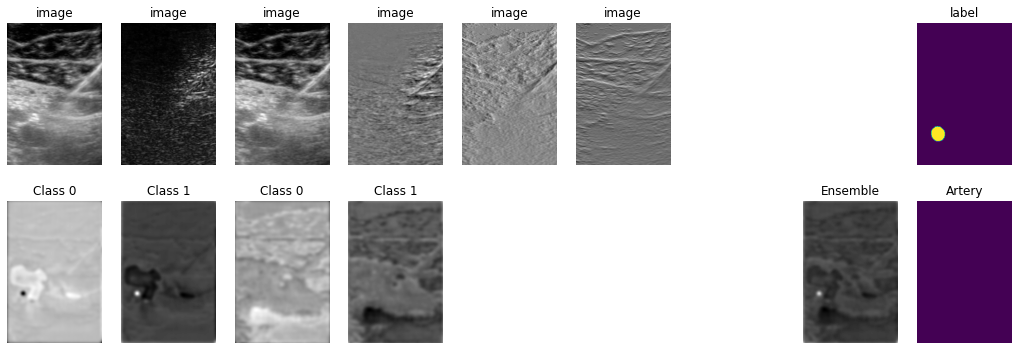

Image: 1. 204 AC Video 1_cropM.nii.gz


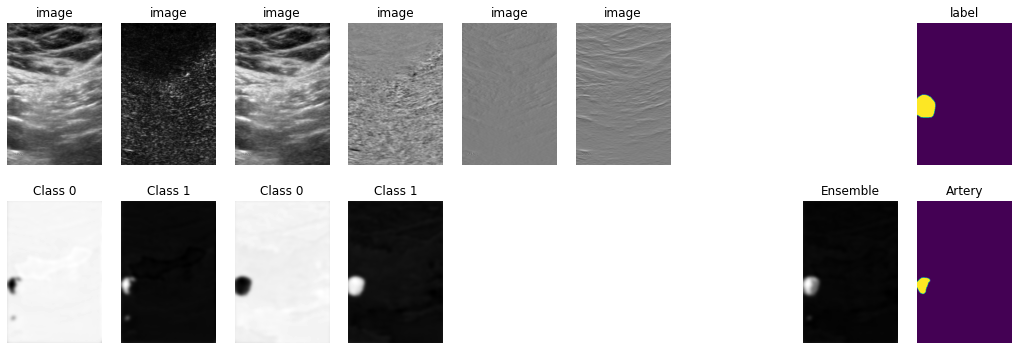

Image: 3. 134 AC_Video 2_cropM.nii.gz


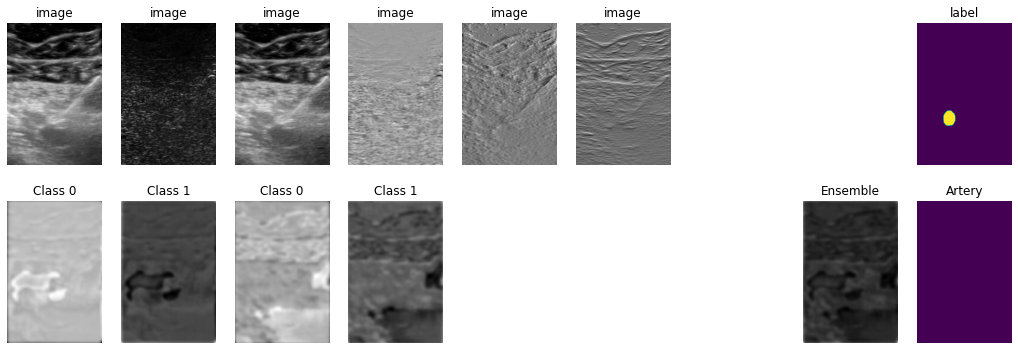

Loading dataset: 100%|██████████| 3/3 [00:06<00:00,  2.03s/it]


VFOLD = 6 of 9
Image: 1. 205 AC_Video 1_cropM.nii.gz


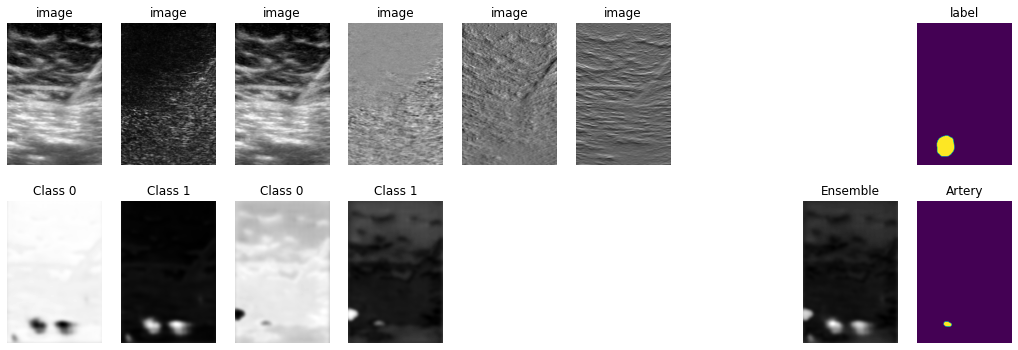

Image: 3. 205 AC_Video 2_cropM.nii.gz


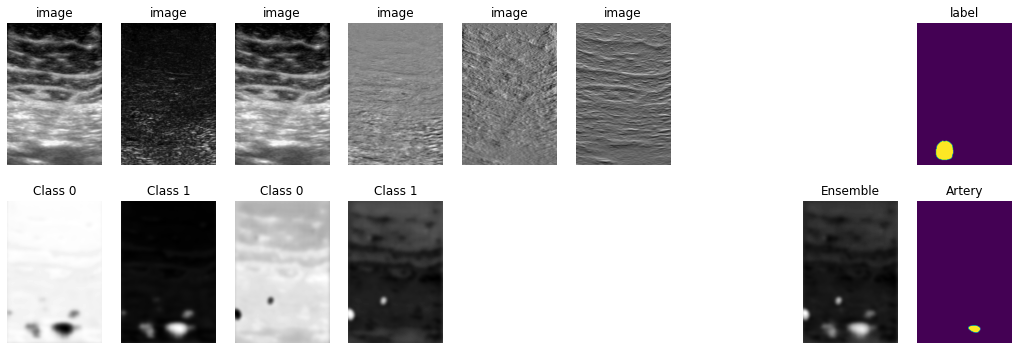

Image: 4. 211 AC_Video 3_cropM.nii.gz


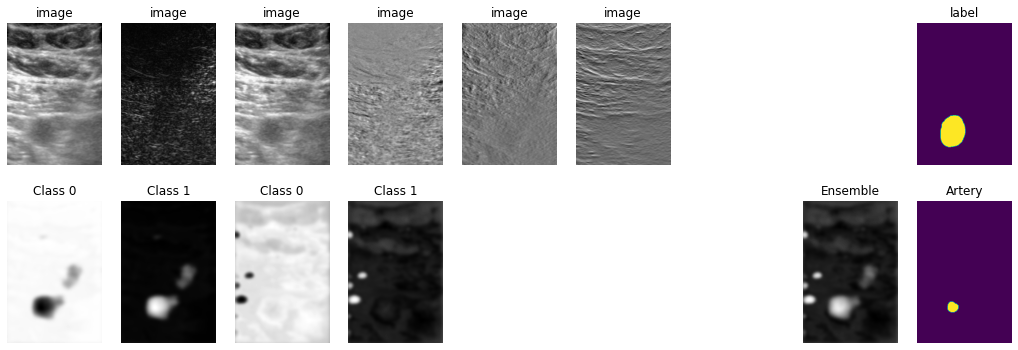

Loading dataset: 100%|██████████| 3/3 [00:03<00:00,  1.04s/it]


VFOLD = 7 of 9
Image: 1. 217 AC_Video 1_cropM.nii.gz


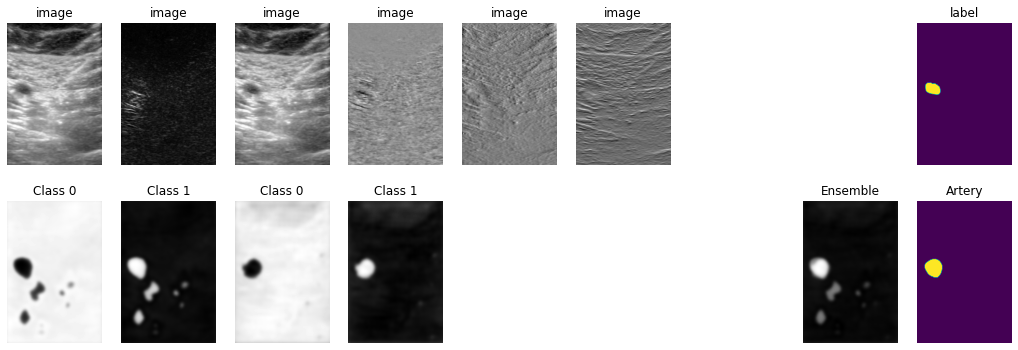

Image: 3. 217 AC_Video 2_cropM.nii.gz


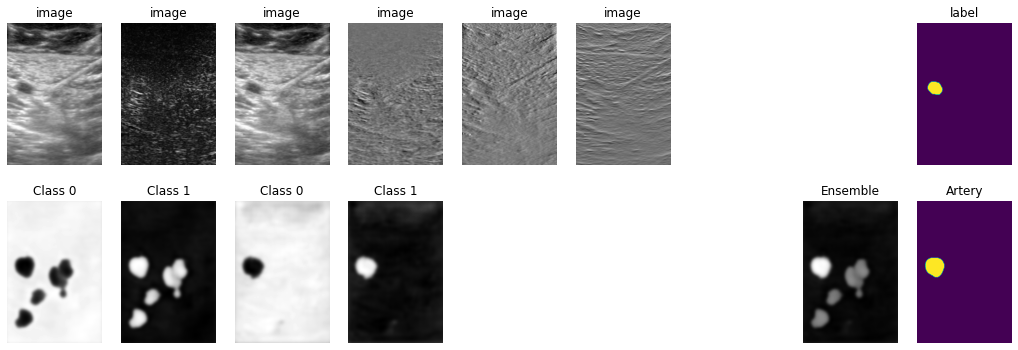

Image: 4. 222A_Video 2_cropM.nii.gz


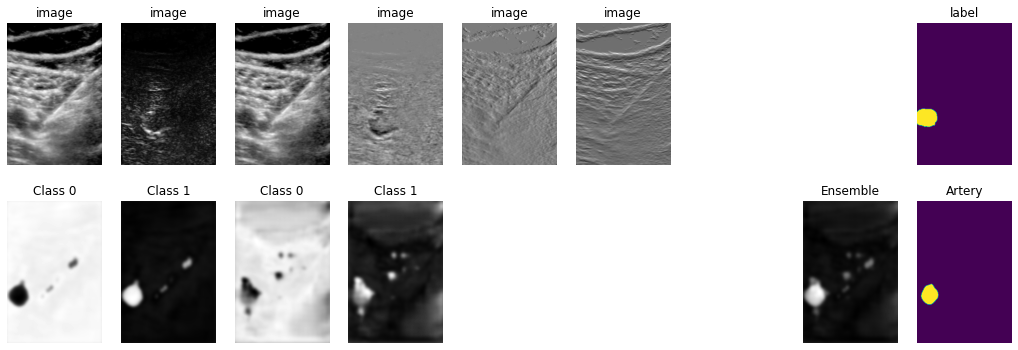

Loading dataset: 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]


VFOLD = 8 of 9
Image: 1. 238 AC_Video 1_cropM.nii.gz


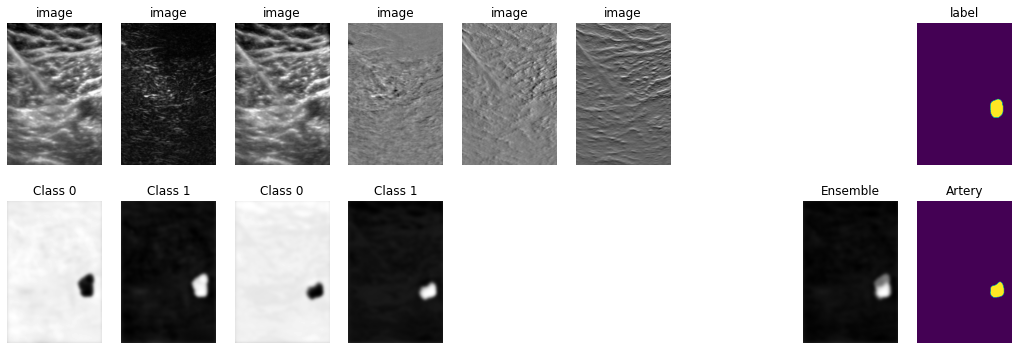

Image: 3. 238 AC_Video 2_cropM.nii.gz


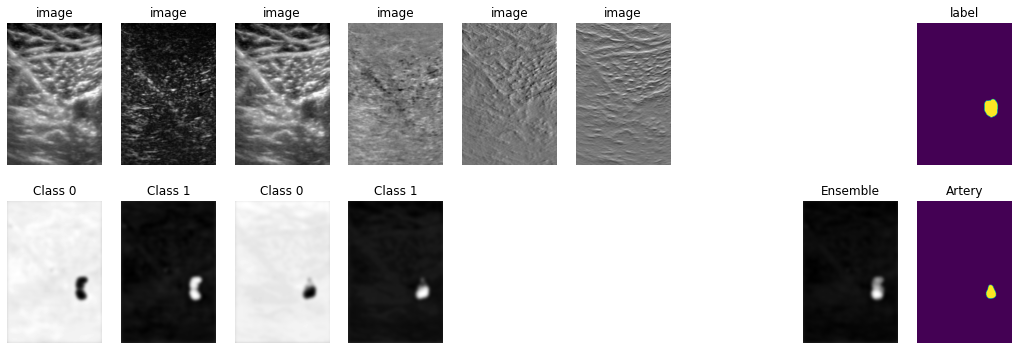

Image: 5. 153 AC_Video 3_cropM.nii.gz


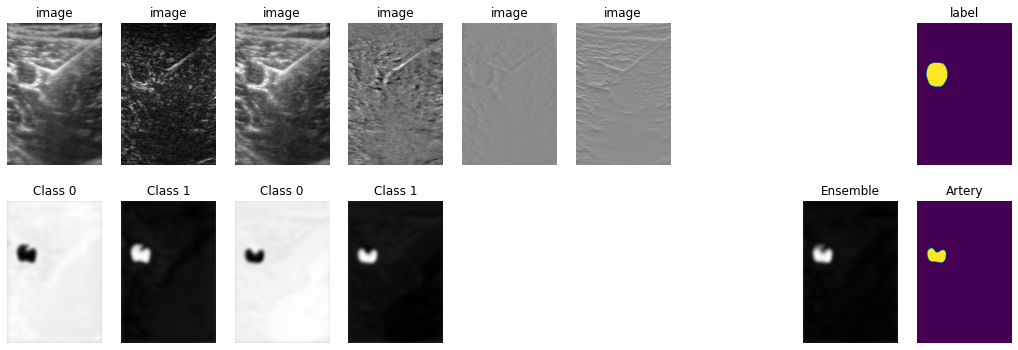

Loading dataset: 100%|██████████| 2/2 [00:06<00:00,  3.14s/it]


VFOLD = 9 of 9
Image: 2. 39 AC_Video 2_cropM.nii.gz


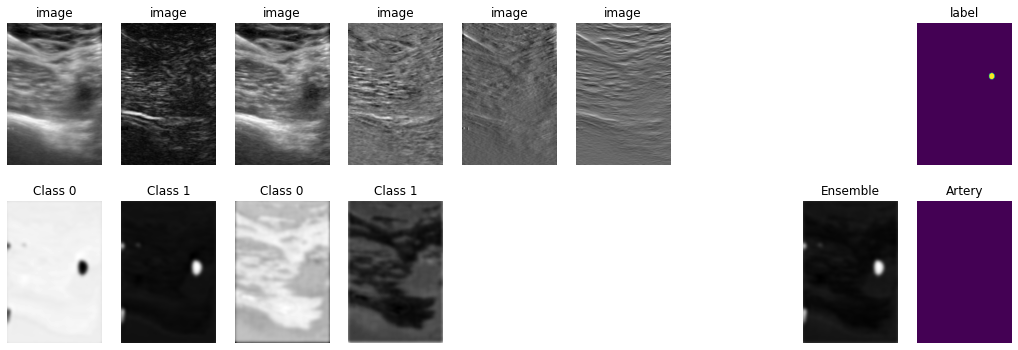

Image: 5. 240 AC_Video 3_cropM.nii.gz


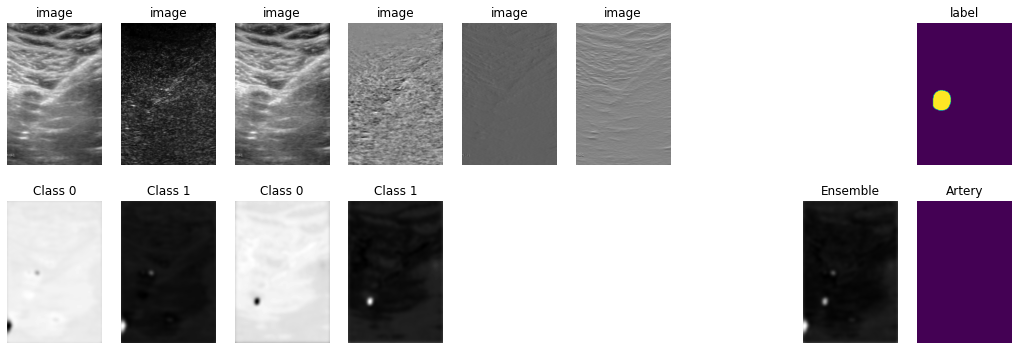

In [4]:
runs = [0,1]
for i in range(myNetwork.num_folds):
    setup_testing_vfold(myNetwork,
                        vfold_num=i)
    test_outputs_list = []
    test_images_list = []
    test_labels_list = []
    for r in runs:
        test_outputs, test_images, test_labels = test_vfold(myNetwork, model_type="best", run_id=r, device_num=0)
        test_outputs_list.append(test_outputs)
        test_images_list.append(test_images)
        test_labels_list.append(test_labels)
    view_testing_results_vfold(myNetwork,
                            test_outputs=test_outputs_list,
                            test_images=test_images_list,
                            test_labels=test_labels_list,
                            model_type="best",
                            run_id=runs, 
                            device_num=3)

In [5]:
import ipyparams
currentNotebook = "ARUNet-Artery-VFold-Test.ipynb"
exp = "EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s"

from datetime import datetime
now = datetime.now()
print(str(currentNotebook))
experimentName = exp+now.strftime("-%Y.%m.%d_%H.%M")
print(experimentName)
cmd = "jupyter nbconvert "+currentNotebook+" --output "+experimentName+" --to pdf"
import subprocess
subprocess.call(cmd, shell=True)

<IPython.core.display.Javascript object>

ARUNet-Artery-VFold-Test.ipynb
EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24


[NbConvertApp] Converting notebook ARUNet-Artery-VFold-Test.ipynb to pdf
[NbConvertApp] Support files will be in EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files/
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_StdOverTime_RawFrame_Gradient-LabelTrue-320x480-16s-2022.08.17_13.24_files
[NbConvertApp] Making directory ./EnsembleClassPriorsTest-PNB-Mean_S

0